In [1]:
import os
import cv2
import sys
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plot
from keras.utils import load_img,img_to_array,array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense
from keras.models import Sequential
import glob,os,random
from keras.applications.resnet import ResNet,ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Dropout
from numpy.random.mtrand import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow.keras.layers import *
import warnings
warnings.filterwarnings('ignore')
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix


In [2]:
MAIN_PATH ='Trafficsign/train_dataset/train'
TEST_PATH ='Trafficsign/test_dataset/test'

CLASSES = os.listdir(MAIN_PATH)
NUM_CLASSES = len(CLASSES)

HEIGHT,WIDTH = 32,32
BATCH_SIZE = 32
SPLIT = 0.2

In [3]:
#to check number of image counts
images = glob.glob(os.path.join(TEST_PATH,"*/*.jpg"))
print(len(images))

324


In [4]:
test_images = glob.glob(os.path.join(TEST_PATH,"*/*.jpg"))
print(len(test_images))

324


# Preprocessing the image

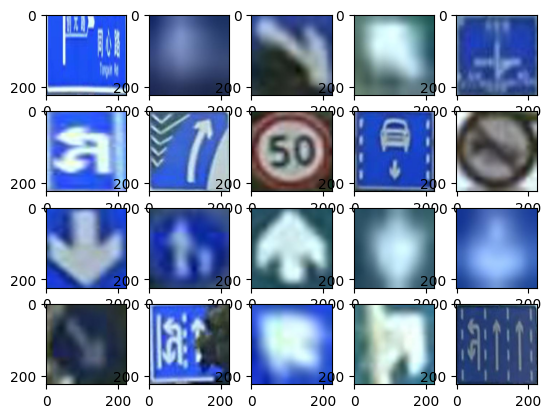

In [5]:
#generating random images display
for index,imageFilePath in enumerate(random.sample(images,20)):
  image = load_img(imageFilePath)
  image = img_to_array(image,dtype = np.uint8)

  plt.subplot(4,5,index + 1)
  plt.imshow(image.squeeze())

In [6]:
CLASSES

['GuideSign', 'M1', 'M4', 'M5', 'M6', 'M7', 'P1', 'P10_50', 'P12', 'W1']

## Building the custom model

In [53]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=SPLIT)

train_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "training",
    class_mode = "categorical",
    shuffle = True
)

val_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "validation",
    class_mode = "categorical",
    shuffle = False
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size = (HEIGHT,WIDTH),
    shuffle = True
)

Found 4823 images belonging to 10 classes.
Found 1201 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


In [8]:
#assigning parameters of the model for custom layer
model = Sequential([
    #layer 1
  Conv2D(filters = 32, kernel_size = 3, padding = 'same',activation = 'relu',
         input_shape = (32,32,3)),MaxPooling2D(pool_size=2),

  #layer 2
  Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'relu')
         ,MaxPooling2D(pool_size=2),

  #layer 3
  Conv2D(filters = 32, kernel_size = 3, padding = 'same',activation = 'relu')
         ,MaxPooling2D(pool_size=2),
  
  #layer 4
    Conv2D(filters = 32, kernel_size = 3, padding = 'same',activation = 'relu')
         ,MaxPooling2D(pool_size=2),

  Flatten(),
  Dense(64, activation = "relu"),
  Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [9]:
 #giving the model optimizers
model.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint(filepath = "./best_fit.h5",monitor = 'val_accuracy', verbose = 1, save_best_only = True)
custom_callbacks = [checkpoint]

In [11]:
result = model.fit(train_ds,epochs = 10, validation_data = val_ds,callbacks = custom_callbacks)

Epoch 1/10
151/151 [==============================] - ETA: 0s - loss: 1.6868 - accuracy: 0.5213
Epoch 1: val_accuracy improved from -inf to 0.53372, saving model to .\best_fit.h5
151/151 [==============================] - 22s 139ms/step - loss: 1.6868 - accuracy: 0.5213 - val_loss: 1.3953 - val_accuracy: 0.5337
Epoch 2/10
151/151 [==============================] - ETA: 0s - loss: 1.2502 - accuracy: 0.5698
Epoch 2: val_accuracy improved from 0.53372 to 0.68110, saving model to .\best_fit.h5
151/151 [==============================] - 15s 98ms/step - loss: 1.2502 - accuracy: 0.5698 - val_loss: 1.0559 - val_accuracy: 0.6811
Epoch 3/10
151/151 [==============================] - ETA: 0s - loss: 0.9502 - accuracy: 0.6919
Epoch 3: val_accuracy improved from 0.68110 to 0.76436, saving model to .\best_fit.h5
151/151 [==============================] - 17s 111ms/step - loss: 0.9502 - accuracy: 0.6919 - val_loss: 0.7966 - val_accuracy: 0.7644
Epoch 4/10
151/151 [==============================] - ET

In [12]:
model.evaluate(test_ds)

11/11 [==============================] - 1s 69ms/step - loss: 0.4905 - accuracy: 0.8735


[0.49045878648757935, 0.8734567761421204]

# graphical representation

In [13]:
def lossGraph(header,result):
  fig = plt.figure(dpi=150, figsize = (10,7))
  ax1 = fig.add_subplot(221)

  ax1.plot(result.history['loss'], label='train_loss')
  ax1.plot(result.history['val_loss'], label = 'val_loss')
  ax1.legend(loc='center right')

  fig.text(0.5, 0.04, 'epoch', ha='center', va='center')
  fig.text(0.03, 0.5, 'loss', ha='center', va='center', rotation='vertical')

  ax1.set_title(header)
  plt.show()


In [14]:
  def accuracyGraph(header,result):
    fig = plt.figure(dpi=150, figsize = (10,7))
    ax1 = fig.add_subplot(221)

    ax1.plot(result.history['accuracy'], label='train_accuracy')
    ax1.plot(result.history['val_accuracy'], label = 'val_accuracy')
    ax1.legend(loc='center right')

    fig.text(0.5, 0.04, 'epoch', ha='center', va='center')
    fig.text(0.03, 0.5, 'loss', ha='center', va='center', rotation='vertical')

    ax1.set_title(header)
    plt.show()

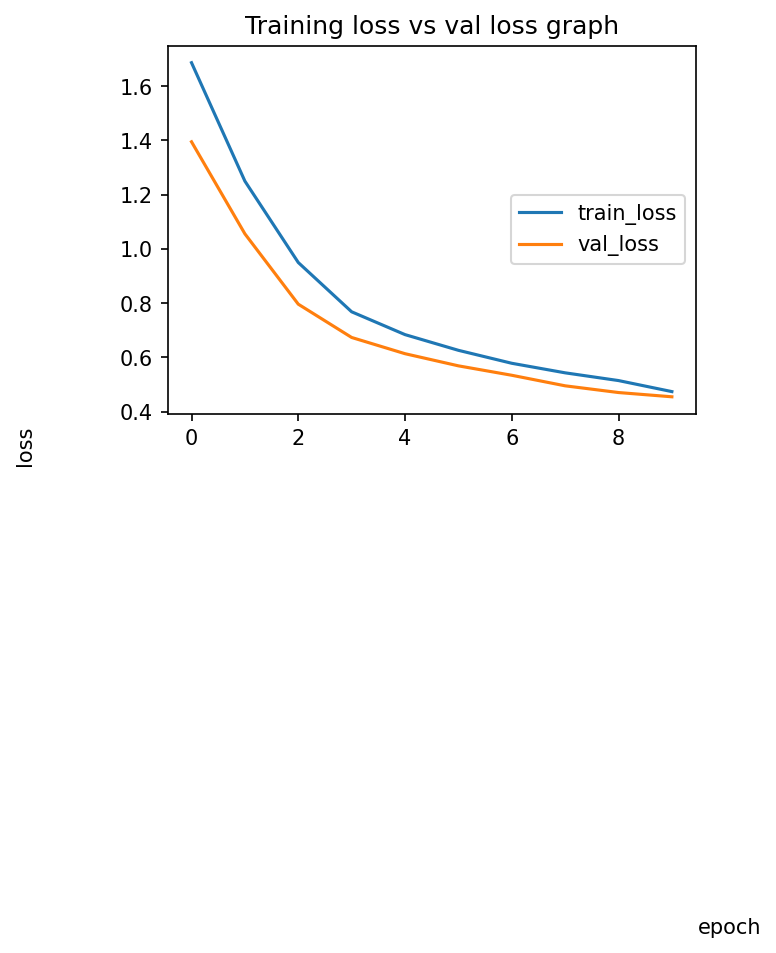

In [15]:
lossGraph("Training loss vs val loss graph",result)

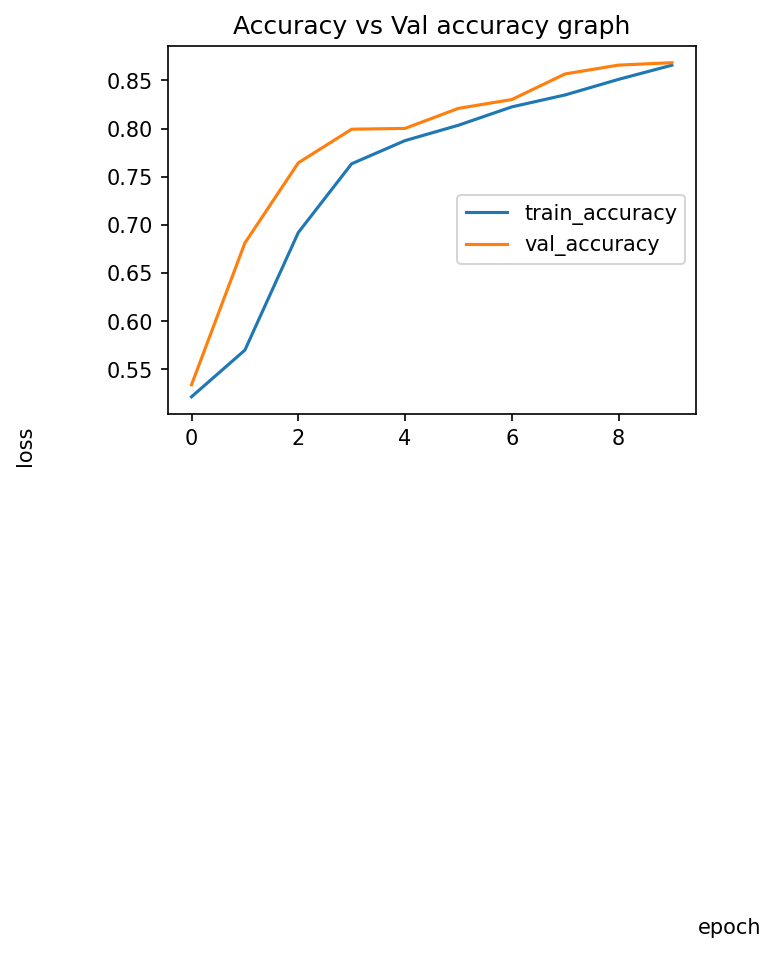

In [16]:
#accuracyGraph
accuracyGraph("Accuracy vs Val accuracy graph",result)

# model evaluation

In [17]:
#confusion matrix plot function 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
    
  if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('confusion matrix, without Normalized')
    
  print(cm)
    
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [18]:
pred_custom = model.predict(x = val_ds, verbose=0)
pred_custom = np.argmax(pred_custom, axis = 1)

In [19]:
labels = list(train_ds.class_indices.keys())

confusion matrix, without Normalized
[[ 53   3 133   5   3  15   8   1   7   6]
 [  4   1  32   2   0   3   4   0   1   2]
 [117  15 365  16  16  50  25  11   5  21]
 [  7   1  23   2   0   6   1   0   0   2]
 [  4   3  18   0   0   1   0   0   0   0]
 [ 10   3  56   2   3  11   2   3   2   1]
 [ 10   0  30   0   2   3   1   1   1   1]
 [  6   0   8   0   0   1   2   0   0   2]
 [  3   0  11   1   0   2   1   0   1   0]
 [  6   0  18   0   0   1   2   0   0   2]]


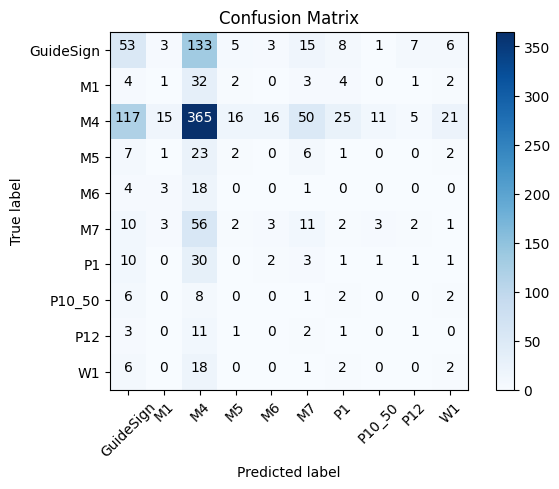

In [20]:
custom_confusion_matrix = confusion_matrix(val_ds.classes, pred_custom)
plot_confusion_matrix(cm = custom_confusion_matrix, classes = labels)

# comparing the CNN models

### VGG16

In [73]:

vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=[HEIGHT,WIDTH, 3])
            
x = vgg16.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(128) (x)
x = tf.keras.layers.LeakyReLU(alpha=0.2) (x)
x = tf.keras.layers.GaussianDropout(0.4) (x)
outputs = tf.keras.layers.Dense(NUM_CLASSES,activation="softmax", dtype='float32')(x)
        
vgg_model = tf.keras.Model(vgg16.input, outputs)
vgg_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [77]:
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
    
loss = tf.keras.losses.CategoricalCrossentropy()
        
metrics = [
       tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy')
    ]

vgg_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [78]:
cpk_path = './best_model.h5'
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_categorical_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1,
    )

reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_categorical_accuracy',
        mode='max',
        factor=0.1,
        patience=3,
        verbose=0
    )

earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_categorical_accuracy',
        mode='max',
        patience=10, 
        verbose=1
    )
    
callbacks = [checkpoint, reducelr, earlystop]         

In [79]:
EPOCHS= 15
VERBOSE =1
    
vgg_model_history = vgg_model.fit(train_ds, 
                        epochs=EPOCHS,
                        callbacks=callbacks,
                        validation_data = val_ds,
                        verbose=VERBOSE)

Epoch 1/15
151/151 [==============================] - ETA: 0s - loss: 1.7026 - categorical_accuracy: 0.5049
Epoch 1: val_categorical_accuracy improved from -inf to 0.53372, saving model to .\best_model.h5
151/151 [==============================] - 279s 2s/step - loss: 1.7026 - categorical_accuracy: 0.5049 - val_loss: 1.5586 - val_categorical_accuracy: 0.5337 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - ETA: 0s - loss: 1.5500 - categorical_accuracy: 0.5329
Epoch 2: val_categorical_accuracy improved from 0.53372 to 0.55870, saving model to .\best_model.h5
151/151 [==============================] - 262s 2s/step - loss: 1.5500 - categorical_accuracy: 0.5329 - val_loss: 1.4451 - val_categorical_accuracy: 0.5587 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 1.2198 - categorical_accuracy: 0.5830
Epoch 3: val_categorical_accuracy improved from 0.55870 to 0.61449, saving model to .\best_model.h5
151/151 [==============================] 

# METRICS VISUALIZATION 

# MODEL EVALUATION

In [81]:
vgg_model.evaluate(val_ds)

38/38 [==============================] - 6s 143ms/step - loss: 0.3514 - categorical_accuracy: 0.8843


[0.351419061422348, 0.8842630982398987]

confusion matrix, without Normalized
[[214   2  12   5   0   0   0   0   0   1]
 [  8  10  21   7   0   2   0   0   1   0]
 [ 15   5 617   3   0   0   0   0   1   0]
 [  7   2   6  27   0   0   0   0   0   0]
 [  1   1   4  20   0   0   0   0   0   0]
 [  1   1   1   0   0  90   0   0   0   0]
 [  0   0   0   0   0   0  48   0   1   0]
 [  0   0   0   0   0   0   0  18   1   0]
 [  2   0   0   0   0   0   1   6  10   0]
 [  2   0   0   0   0   0   0   0   3  24]]


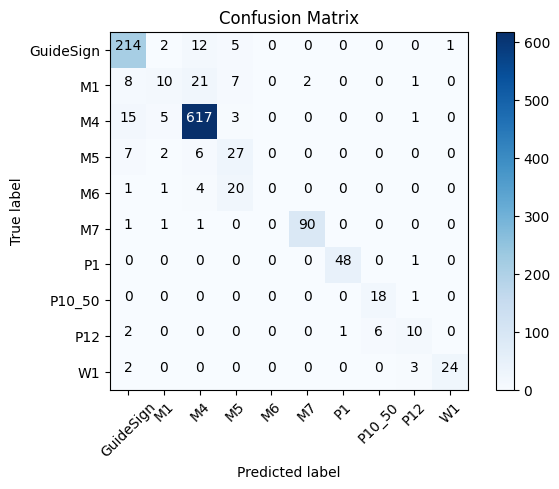

In [84]:
pred_vgg16= vgg_model.predict(x = val_ds, verbose=0)
pred_vgg16 = np.argmax(pred_vgg16, axis = 1)

vgg_confusion_matrix = confusion_matrix(val_ds.classes,pred_vgg16)
plot_confusion_matrix(cm = vgg_confusion_matrix, classes = labels)

In [86]:
print(classification_report(val_ds.classes,pred_vgg16,target_names = labels))

              precision    recall  f1-score   support

   GuideSign       0.86      0.91      0.88       234
          M1       0.48      0.20      0.29        49
          M4       0.93      0.96      0.95       641
          M5       0.44      0.64      0.52        42
          M6       0.00      0.00      0.00        26
          M7       0.98      0.97      0.97        93
          P1       0.98      0.98      0.98        49
      P10_50       0.75      0.95      0.84        19
         P12       0.59      0.53      0.56        19
          W1       0.96      0.83      0.89        29

    accuracy                           0.88      1201
   macro avg       0.70      0.70      0.69      1201
weighted avg       0.86      0.88      0.87      1201



# ResNet152V2

In [87]:
resnet = ResNet152V2(include_top=False,weights = 'imagenet',pooling = 'avg', input_shape=(32,32, 3))

# Freeze the layers of the pre-trained model
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = Flatten()(resnet.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

In [88]:
resnetModel = Model(inputs=resnet.input, outputs=output)

# call backs

In [89]:
checkpoint = ModelCheckpoint(filepath = "./resnet_best_fit.h5",monitor = 'val_accuracy', verbose = 1, save_best_only = True)
custom_callbaks = [checkpoint]

In [90]:
resnetModel.compile(optimizer= Adam(lr=0.00001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
resnet_result = resnetModel.fit(train_ds,epochs = 15, validation_data = val_ds, callbacks = create_callbacks())

Epoch 1/15
151/151 [==============================] - ETA: 0s - loss: 2.1644 - accuracy: 0.2899WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 101s 470ms/step - loss: 2.1644 - accuracy: 0.2899 - val_loss: 1.8612 - val_accuracy: 0.5354 - lr: 1.0000e-05
Epoch 2/15
151/151 [==============================] - ETA: 0s - loss: 1.8618 - accuracy: 0.5144WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 48s 321ms/step - loss: 1.8618 - accuracy: 0.5144 - val_loss: 1.6851 - val_accuracy: 0.5354 - lr: 1.0000e-05
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 1.7132 - accuracy: 0.5337WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 51s 338ms/step - loss: 1.7132 - accuracy: 0.5337 - val_loss: 1.5658 - val_accuracy: 0.5387 - lr: 1.0000e-05
Epoch 4/15
151/151 [==============================] - ETA: 0s - loss: 1.6121 - accuracy: 0.5430WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 53s 354ms/step - loss: 1.6121 - accuracy: 0.5430 - val_loss: 1.4901 - val_accuracy: 0.5462 - lr: 1.0000e-05
Epoch 5/15
151/151 [==============================] - ETA: 0s - loss: 1.5297 - accuracy: 0.5482WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 58s 387ms/step - loss: 1.5297 - accuracy: 0.5482 - val_loss: 1.3869 - val_accuracy: 0.5620 - lr: 1.0000e-05
Epoch 6/15
151/151 [==============================] - ETA: 0s - loss: 1.4638 - accuracy: 0.5648WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 57s 376ms/step - loss: 1.4638 - accuracy: 0.5648 - val_loss: 1.3363 - val_accuracy: 0.5704 - lr: 1.0000e-05
Epoch 7/15
151/151 [==============================] - ETA: 0s - loss: 1.3835 - accuracy: 0.5752WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 57s 375ms/step - loss: 1.3835 - accuracy: 0.5752 - val_loss: 1.2558 - val_accuracy: 0.5953 - lr: 1.0000e-05
Epoch 8/15
151/151 [==============================] - ETA: 0s - loss: 1.3144 - accuracy: 0.5984WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 60s 398ms/step - loss: 1.3144 - accuracy: 0.5984 - val_loss: 1.2160 - val_accuracy: 0.6145 - lr: 1.0000e-05
Epoch 9/15
151/151 [==============================] - ETA: 0s - loss: 1.2744 - accuracy: 0.6029WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 63s 421ms/step - loss: 1.2744 - accuracy: 0.6029 - val_loss: 1.1630 - val_accuracy: 0.6361 - lr: 1.0000e-05
Epoch 10/15
151/151 [==============================] - ETA: 0s - loss: 1.2340 - accuracy: 0.6104WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 62s 409ms/step - loss: 1.2340 - accuracy: 0.6104 - val_loss: 1.1140 - val_accuracy: 0.6361 - lr: 1.0000e-05
Epoch 11/15
151/151 [==============================] - ETA: 0s - loss: 1.1924 - accuracy: 0.6218WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 54s 355ms/step - loss: 1.1924 - accuracy: 0.6218 - val_loss: 1.0854 - val_accuracy: 0.6445 - lr: 1.0000e-05
Epoch 12/15
151/151 [==============================] - ETA: 0s - loss: 1.1529 - accuracy: 0.6365WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 55s 363ms/step - loss: 1.1529 - accuracy: 0.6365 - val_loss: 1.0570 - val_accuracy: 0.6611 - lr: 1.0000e-05
Epoch 13/15
151/151 [==============================] - ETA: 0s - loss: 1.1191 - accuracy: 0.6436WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 56s 373ms/step - loss: 1.1191 - accuracy: 0.6436 - val_loss: 1.0293 - val_accuracy: 0.6644 - lr: 1.0000e-05
Epoch 14/15
151/151 [==============================] - ETA: 0s - loss: 1.0988 - accuracy: 0.6436WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 53s 349ms/step - loss: 1.0988 - accuracy: 0.6436 - val_loss: 1.0025 - val_accuracy: 0.6703 - lr: 1.0000e-05
Epoch 15/15
151/151 [==============================] - ETA: 0s - loss: 1.0645 - accuracy: 0.6513WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


151/151 [==============================] - 56s 368ms/step - loss: 1.0645 - accuracy: 0.6513 - val_loss: 0.9727 - val_accuracy: 0.6736 - lr: 1.0000e-05


In [91]:
resnetModel.evaluate(train_ds)

151/151 [==============================] - 44s 294ms/step - loss: 0.9766 - accuracy: 0.6759


[0.976604700088501, 0.6759278178215027]

confusion matrix, without Normalized
[[105   0 128   0   0   1   0   0   0   0]
 [  1   0  42   0   0   0   6   0   0   0]
 [ 25   0 615   0   0   1   0   0   0   0]
 [  7   0  33   1   0   0   1   0   0   0]
 [ 18   0   4   0   0   0   4   0   0   0]
 [  1   0  48   0   0  43   1   0   0   0]
 [  2   0   9   0   0   0  38   0   0   0]
 [  0   0   1   0   0   0   3  15   0   0]
 [  1   0  12   0   0   0   3   2   1   0]
 [  1   0  13   0   0   5   2   0   0   8]]


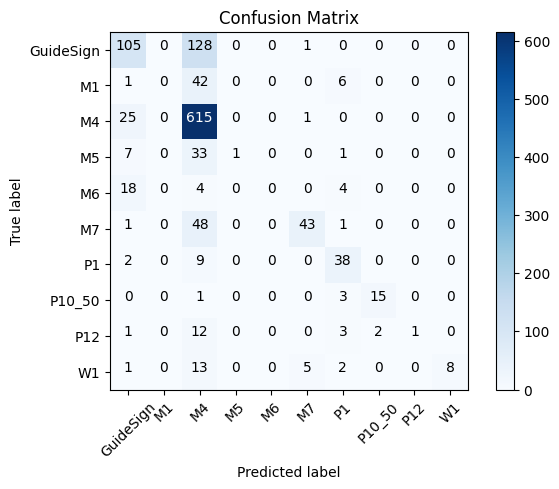

In [92]:
pred_resnet = resnetModel.predict(x = val_ds, verbose=0)
pred_resnet = np.argmax(pred_resnet, axis = 1)

resnet_confusion_matrix = confusion_matrix(val_ds.classes,pred_resnet)
plot_confusion_matrix(cm = resnet_confusion_matrix, classes = labels)

In [93]:
print(classification_report(val_ds.classes,pred_resnet,target_names = labels))

              precision    recall  f1-score   support

   GuideSign       0.65      0.45      0.53       234
          M1       0.00      0.00      0.00        49
          M4       0.68      0.96      0.80       641
          M5       1.00      0.02      0.05        42
          M6       0.00      0.00      0.00        26
          M7       0.86      0.46      0.60        93
          P1       0.66      0.78      0.71        49
      P10_50       0.88      0.79      0.83        19
         P12       1.00      0.05      0.10        19
          W1       1.00      0.28      0.43        29

    accuracy                           0.69      1201
   macro avg       0.67      0.38      0.41      1201
weighted avg       0.67      0.69      0.63      1201



### VISUAL REPRESENTATION

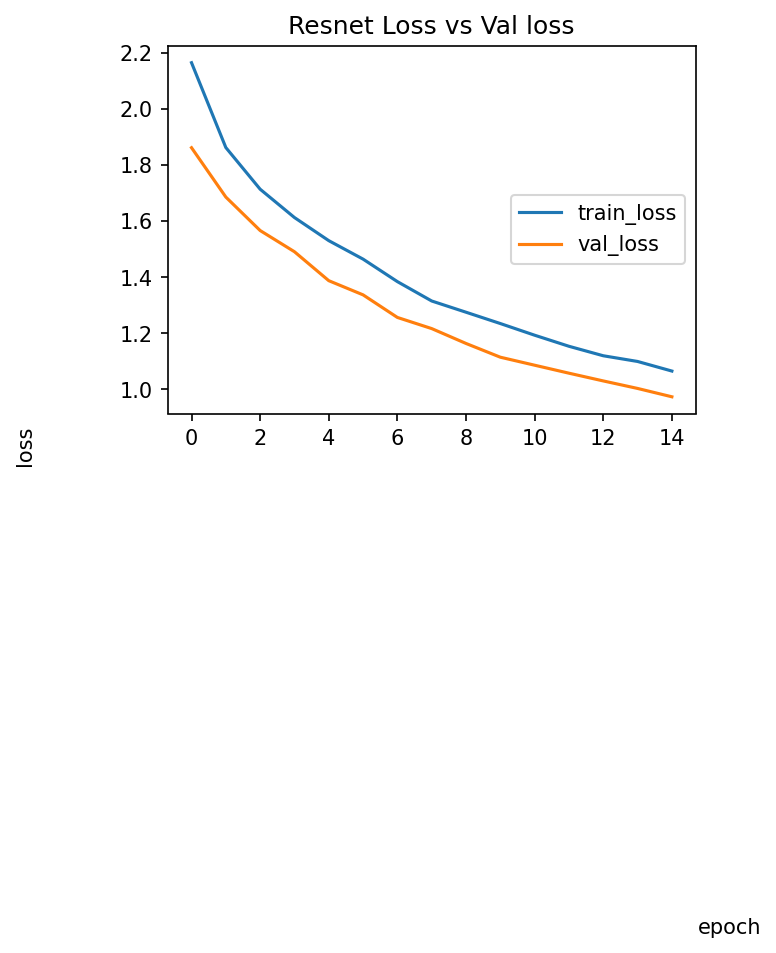

In [94]:
lossGraph("Resnet Loss vs Val loss",resnet_result)

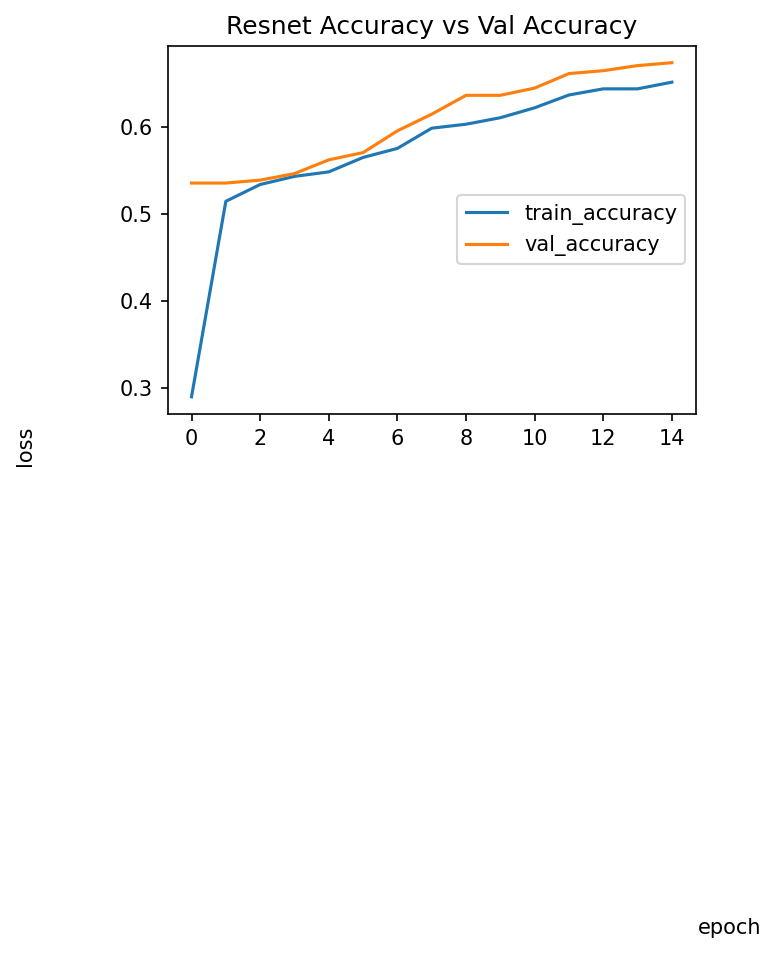

In [95]:
accuracyGraph("Resnet Accuracy vs Val Accuracy",resnet_result)

# DesNet121

In [121]:
    denseModel =  DenseNet121(
         input_shape=((32,32, 3)), include_top=False, weights="imagenet", pooling='avg',
        # classifier_activation="softmax"
    )
    # Freeze the layers of the pre-trained model
    for layer in denseModel.layers:
        layer.trainable = False

    # Add custom layers on top of the pre-trained model
    x = Flatten()(denseModel.output)
    x = Dropout(0.3)(x)
    output = Dense(10, activation='softmax')(x)


In [122]:
denseModelObatined = Model(inputs=denseModel.input, outputs=output)

In [123]:
denseModelObatined.compile(optimizer= Adam(lr=0.0003),loss = 'categorical_crossentropy',metrics = ['accuracy'])
denseModelHistory = denseModelObatined.fit(train_ds,epochs = 15, validation_data = val_ds)

Epoch 1/15
151/151 [==============================] - 83s 457ms/step - loss: 1.7553 - accuracy: 0.4922 - val_loss: 0.8776 - val_accuracy: 0.7086
Epoch 2/15
151/151 [==============================] - 64s 425ms/step - loss: 0.8571 - accuracy: 0.7124 - val_loss: 0.6021 - val_accuracy: 0.7960
Epoch 3/15
151/151 [==============================] - 62s 410ms/step - loss: 0.6549 - accuracy: 0.7804 - val_loss: 0.5061 - val_accuracy: 0.8127
Epoch 4/15
151/151 [==============================] - 62s 409ms/step - loss: 0.5560 - accuracy: 0.8161 - val_loss: 0.4459 - val_accuracy: 0.8510
Epoch 5/15
151/151 [==============================] - 66s 436ms/step - loss: 0.4763 - accuracy: 0.8470 - val_loss: 0.4061 - val_accuracy: 0.8618
Epoch 6/15
151/151 [==============================] - 63s 420ms/step - loss: 0.4548 - accuracy: 0.8488 - val_loss: 0.4030 - val_accuracy: 0.8560
Epoch 7/15
151/151 [==============================] - 68s 451ms/step - loss: 0.4103 - accuracy: 0.8623 - val_loss: 0.3698 - val_ac

In [124]:
denseModelObatined.evaluate(train_ds)

151/151 [==============================] - 34s 223ms/step - loss: 0.2401 - accuracy: 0.9206


[0.24005357921123505, 0.9205888509750366]

confusion matrix, without Normalized
[[194   0  33   5   0   2   0   0   0   0]
 [  0  35  12   0   1   1   0   0   0   0]
 [ 16   4 613   6   1   1   0   0   0   0]
 [  5   2   6  26   2   0   1   0   0   0]
 [  1   1   1   0  23   0   0   0   0   0]
 [  0   3   1   0   0  89   0   0   0   0]
 [  0   0   2   0   0   0  45   0   2   0]
 [  0   0   0   0   0   0   0  19   0   0]
 [  0   0   0   0   0   0   3   1  15   0]
 [  2   0   1   0   0   3   0   0   0  23]]


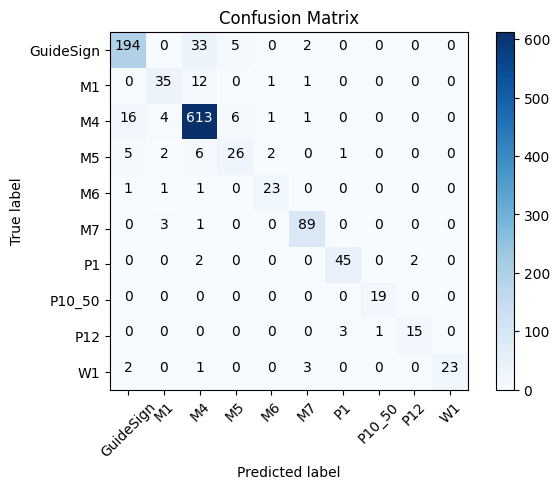

In [129]:
pred_dense = denseModelObatined.predict(x = val_ds, verbose=0)
pred_dense = np.argmax(pred_dense, axis = 1)

dense_confusion_matrix = confusion_matrix(val_ds.classes,pred_dense)
plot_confusion_matrix(cm = dense_confusion_matrix, classes = labels)

In [130]:
print(classification_report(val_ds.classes,pred_dense,target_names = labels))

              precision    recall  f1-score   support

   GuideSign       0.89      0.83      0.86       234
          M1       0.78      0.71      0.74        49
          M4       0.92      0.96      0.94       641
          M5       0.70      0.62      0.66        42
          M6       0.85      0.88      0.87        26
          M7       0.93      0.96      0.94        93
          P1       0.92      0.92      0.92        49
      P10_50       0.95      1.00      0.97        19
         P12       0.88      0.79      0.83        19
          W1       1.00      0.79      0.88        29

    accuracy                           0.90      1201
   macro avg       0.88      0.85      0.86      1201
weighted avg       0.90      0.90      0.90      1201



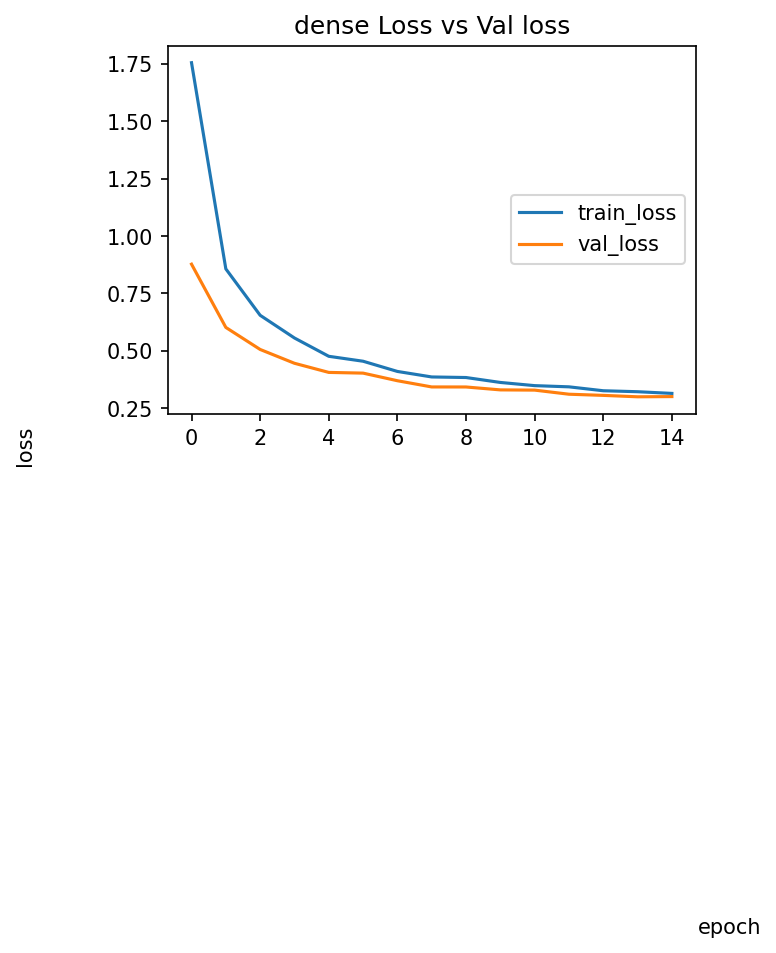

In [131]:
lossGraph("dense Loss vs Val loss",denseModelHistory)

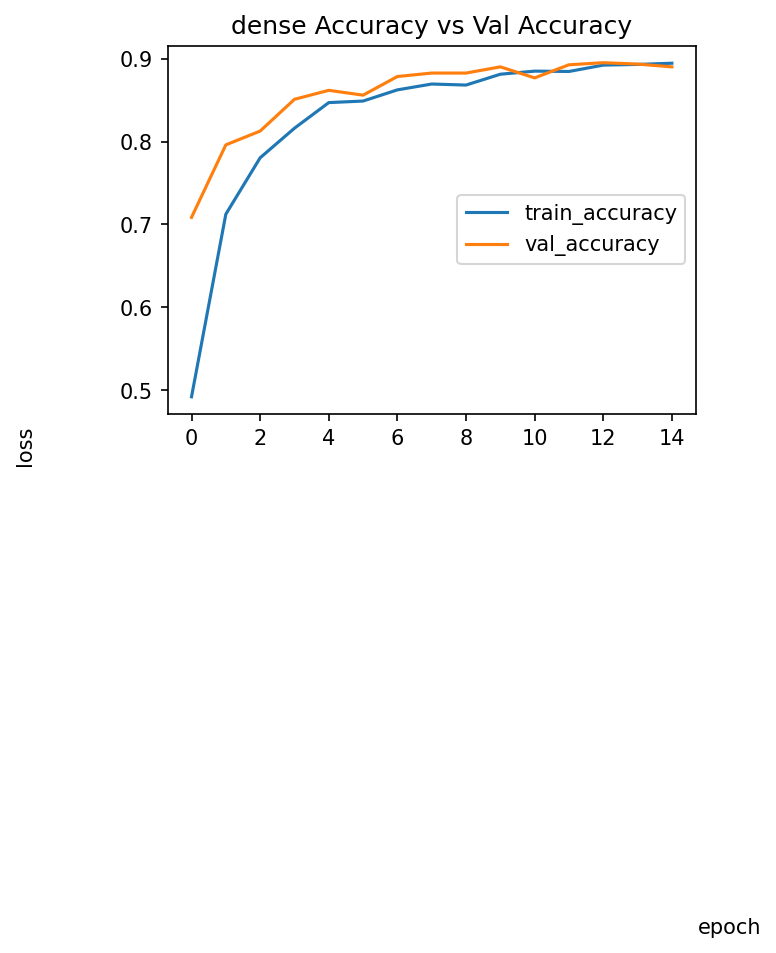

In [128]:
accuracyGraph("dense Accuracy vs Val Accuracy",denseModelHistory)